In [298]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv


## Library

In [299]:
import pandas as pd

# Import Data 

In [300]:
data = pd.read_csv('/kaggle/input/bank-customer-churn-dataset/Bank Customer Churn Prediction.csv')
data.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


# Check dataset

In [301]:
print("Shape of data :",data.shape)
print("**************************************")
print("Data Description :", data.info())

Shape of data : (10000, 12)
**************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
Data Description : None


## data columns
### [ Numberical Features & Categorical Featrues ]

In [302]:
data.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [303]:
numerical_columns = data.select_dtypes(include='number').columns.tolist()
categorical_columns = data.select_dtypes(exclude='number').columns.tolist()
numerical_columns.remove('churn')
print("Numerical Features:",'\n', numerical_columns , "\n")
print("Categorical Features",'\n', categorical_columns)
# include='number'คอลัมน์ที่เป็นตัวเลข
# exclude='number' คอลัมน์ที่ไม่ใช่ตัวเลข

Numerical Features: 
 ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary'] 

Categorical Features 
 ['country', 'gender']


### Change Catagorical to Numerical

In [304]:
# เพิ่มคอลัมน์ใหม่และกำหนดค่าให้เท่ากับคอลัมน์ 'เพศ' โดยเปลี่ยน 'หญิง' เป็น 1 และ 'ชาย' เป็น 2
data['gender_numeric'] = data['gender'].replace({'Female': 1, 'Male': 2})
data['country_numeric'] =data['country'].replace({'France':1, 'Germany': 2, 'Spain':3})


/tmp/ipykernel_33/1094732590.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender_numeric'] = data['gender'].replace({'Female': 1, 'Male': 2})
/tmp/ipykernel_33/1094732590.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['country_numeric'] =data['country'].replace({'France':1, 'Germany': 2, 'Spain':3})


In [305]:
Full_data = data.copy()
Full_data.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_numeric,country_numeric
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,1
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,3
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,2,3
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0,2,1
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,1,2
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,2,1
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,2,1


In [306]:
tenure = pd.DataFrame(data.tenure.value_counts())
country = pd.DataFrame(data.country.value_counts())
products_number = pd.DataFrame(data.products_number.value_counts())
credit_card = pd.DataFrame(data.credit_card.value_counts())
active_member = pd.DataFrame(data.active_member.value_counts())
gender = pd.DataFrame(data.gender.value_counts())

#print('tenure : ', tenure)
#print('products_number : ', products_number)
#print('credit_card : ', credit_card)
#print('active_member : ', active_member)
#print('gender : ', gender)

In [307]:
country

,count
country,
France,5014
Germany,2509
Spain,2477


In [308]:
tenure

,count
tenure,
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967


In [309]:
products_number

,count
products_number,
1,5084
2,4590
3,266
4,60


In [310]:
credit_card

,count
credit_card,
1,7055
0,2945


In [311]:
active_member

,count
active_member,
1,5151
0,4849


In [312]:
gender

,count
gender,
Male,5457
Female,4543


# Visualization

In [313]:
import seaborn as sns

In [314]:
drop_catagorical = ['gender','country']
data_for_corr = data.drop(drop_catagorical, axis=1)
data_for_corr.corr()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_numeric,country_numeric
customer_id,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248,-0.002641,0.006516
credit_score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,-0.002857,0.007888
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,-0.027544,0.022812
tenure,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,0.014733,0.003739
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533,0.012087,0.069408
products_number,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,-0.021859,0.003972
credit_card,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,0.005766,-0.008523
active_member,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,0.022544,0.006724
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097,-0.008112,-0.001369
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,-0.106512,0.035943


In [315]:
data_for_corr.columns

Index(['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'gender_numeric', 'country_numeric'],
      dtype='object')

In [316]:
pariplot_cols=['customer_id', 'credit_score', 'age', 'tenure', 'balance',
       'products_number', 'credit_card', 'active_member', 'estimated_salary',
       'churn', 'gender_numeric', 'country_numeric']

In [317]:
#sns.pairplot(data_for_corr, vars=pariplot_cols, hue='churn', markers=['o','D','+'], plot_kws={'alpha': .4});

# Model Machine Learning 
1. Split data
2.Model training
3.Evaluation
4.score

In [318]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
import numpy as np

In [319]:
Full_data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_numeric,country_numeric
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,1
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1,3


# split data to X , Y -> target

In [320]:
# แบ่งข้อมูล
column_to_drop =["churn","gender",'country']
X = data.drop(column_to_drop, axis=1)
Y = data['churn']

#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

## PCA

In [321]:
X.head()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender_numeric,country_numeric
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,1
1,15647311,608,41,1,83807.86,1,0,1,112542.58,1,3
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,1
3,15701354,699,39,1,0.00,2,0,0,93826.63,1,1
4,15737888,850,43,2,125510.82,1,1,1,79084.10,1,3


In [322]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler # Z-Score

In [323]:
drop_for_pca = ['customer_id','tenure','products_number','credit_card','active_member','gender_numeric','country_numeric']
x_pca = X.drop(drop_for_pca, axis=1)
cols_x_pca = ['credit_score','age','balance','estimated_salary']
x_pca[cols_x_pca]

,credit_score,age,balance,estimated_salary
0,619,42,0.00,101348.88
1,608,41,83807.86,112542.58
2,502,42,159660.80,113931.57
3,699,39,0.00,93826.63
4,850,43,125510.82,79084.10
...,...,...,...,...
9995,771,39,0.00,96270.64
9996,516,35,57369.61,101699.77
9997,709,36,0.00,42085.58
9998,772,42,75075.31,92888.52


In [324]:
x_pca
scaler = StandardScaler()
x_pca_t=scaler.fit_transform(x_pca)

z-score=(x-mean)/sd

In [325]:
scaler.mean_

array([6.50528800e+02, 3.89218000e+01, 7.64858893e+04, 1.00090240e+05])

In [326]:
scaler.var_

array([9.34092597e+03, 1.09983085e+02, 3.89304683e+09, 3.30712604e+09])

หลังจากทำการ Scaler เเล้ว จะเเบ่งเป็น4 columns ตามลำดับที่เราเรียงตั้งเเต่ตอนเเรก

In [327]:
x_pca_t.round(4)

array([[-0.3262,  0.2935, -1.2258,  0.0219],
       [-0.44  ,  0.1982,  0.1174,  0.2165],
       [-1.5368,  0.2935,  1.3331,  0.2407],
       ...,
       [ 0.605 , -0.2786, -1.2258, -1.0086],
       [ 1.2568,  0.2935, -0.0226, -0.1252],
       [ 1.4638, -1.0414,  0.86  , -1.0764]])

#### สร้าง DataFrame ใหม่

In [328]:
dz = pd.DataFrame(x_pca_t.round(4), columns=[f'z_{c}' for c in cols_x_pca])
dz

,z_credit_score,z_age,z_balance,z_estimated_salary
0,-0.3262,0.2935,-1.2258,0.0219
1,-0.4400,0.1982,0.1174,0.2165
2,-1.5368,0.2935,1.3331,0.2407
3,0.5015,0.0075,-1.2258,-0.1089
4,2.0639,0.3889,0.7857,-0.3653
...,...,...,...,...
9995,1.2465,0.0075,-1.2258,-0.0664
9996,-1.3919,-0.3740,-0.3064,0.0280
9997,0.6050,-0.2786,-1.2258,-1.0086
9998,1.2568,0.2935,-0.0226,-0.1252


In [329]:
x_pca_t.shape

(10000, 4)

In [330]:
dz.shape

(10000, 4)

## PCA

In [331]:
#pca = PCA(n_components = x_pca_t.shape[1])
# หรือจะพิมพ์ตัวเลขเข้าไปเเทนก็ได้
pca = PCA(n_components = 3)

pca.fit_transform(x_pca_t)
print(f'explained_variance (n_components={pca.n_components}) = {pca.explained_variance_}') # Eigenvalue
print(f'explained_variance_ratio (n_components={pca.n_components}) = {pca.explained_variance_ratio_}') # % นั้นเอง
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components=3) = [1.02912628 1.00573269 1.00111998]
explained_variance_ratio (n_components=3) = [0.25725584 0.25140803 0.25025497]
sum explained_variance_ratio = 0.7589188390932786


สร้าง def เเล้วผ่านค่าเข้าไปเเทน

In [332]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [333]:
def scree_plot(X, n_components, with_cumulative=False, show_data_label=False, figsize=(10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t=scaler.fit_transform(X)

    max_components = min(X.shape)
    x=np.arange(1, n_components+1)
    pca = PCA(n_components=max_components)
    pca.fit_transform(X_t)
    y1=pca.explained_variance_ratio_[:n_components]
    y2=np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    plt.figure(figsize=figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'
    if with_cumulative:
        plt.plot(x, y2, linestyle='--', marker=marker, label='cumulative', color='salmon')
        
    plt.plot(x, y1, linestyle='-', marker=marker, label='individual', color='deepskyblue')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()
    if with_cumulative:
        [plt.axhline(y=xl, color='.7', linestyle='--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis='x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags=['refs_ok']), 
                            np.nditer(y1, flags=['refs_ok']),
                            np.nditer(y2, flags=['refs_ok'])):
                plt.text(n+.02, v+.02, f'{v*100:.2f}%', fontsize=10)
                if with_cumulative:
                    plt.text(n+.02, cv+.02, f'{cv*100:.2f}%', fontsize=10)
                            

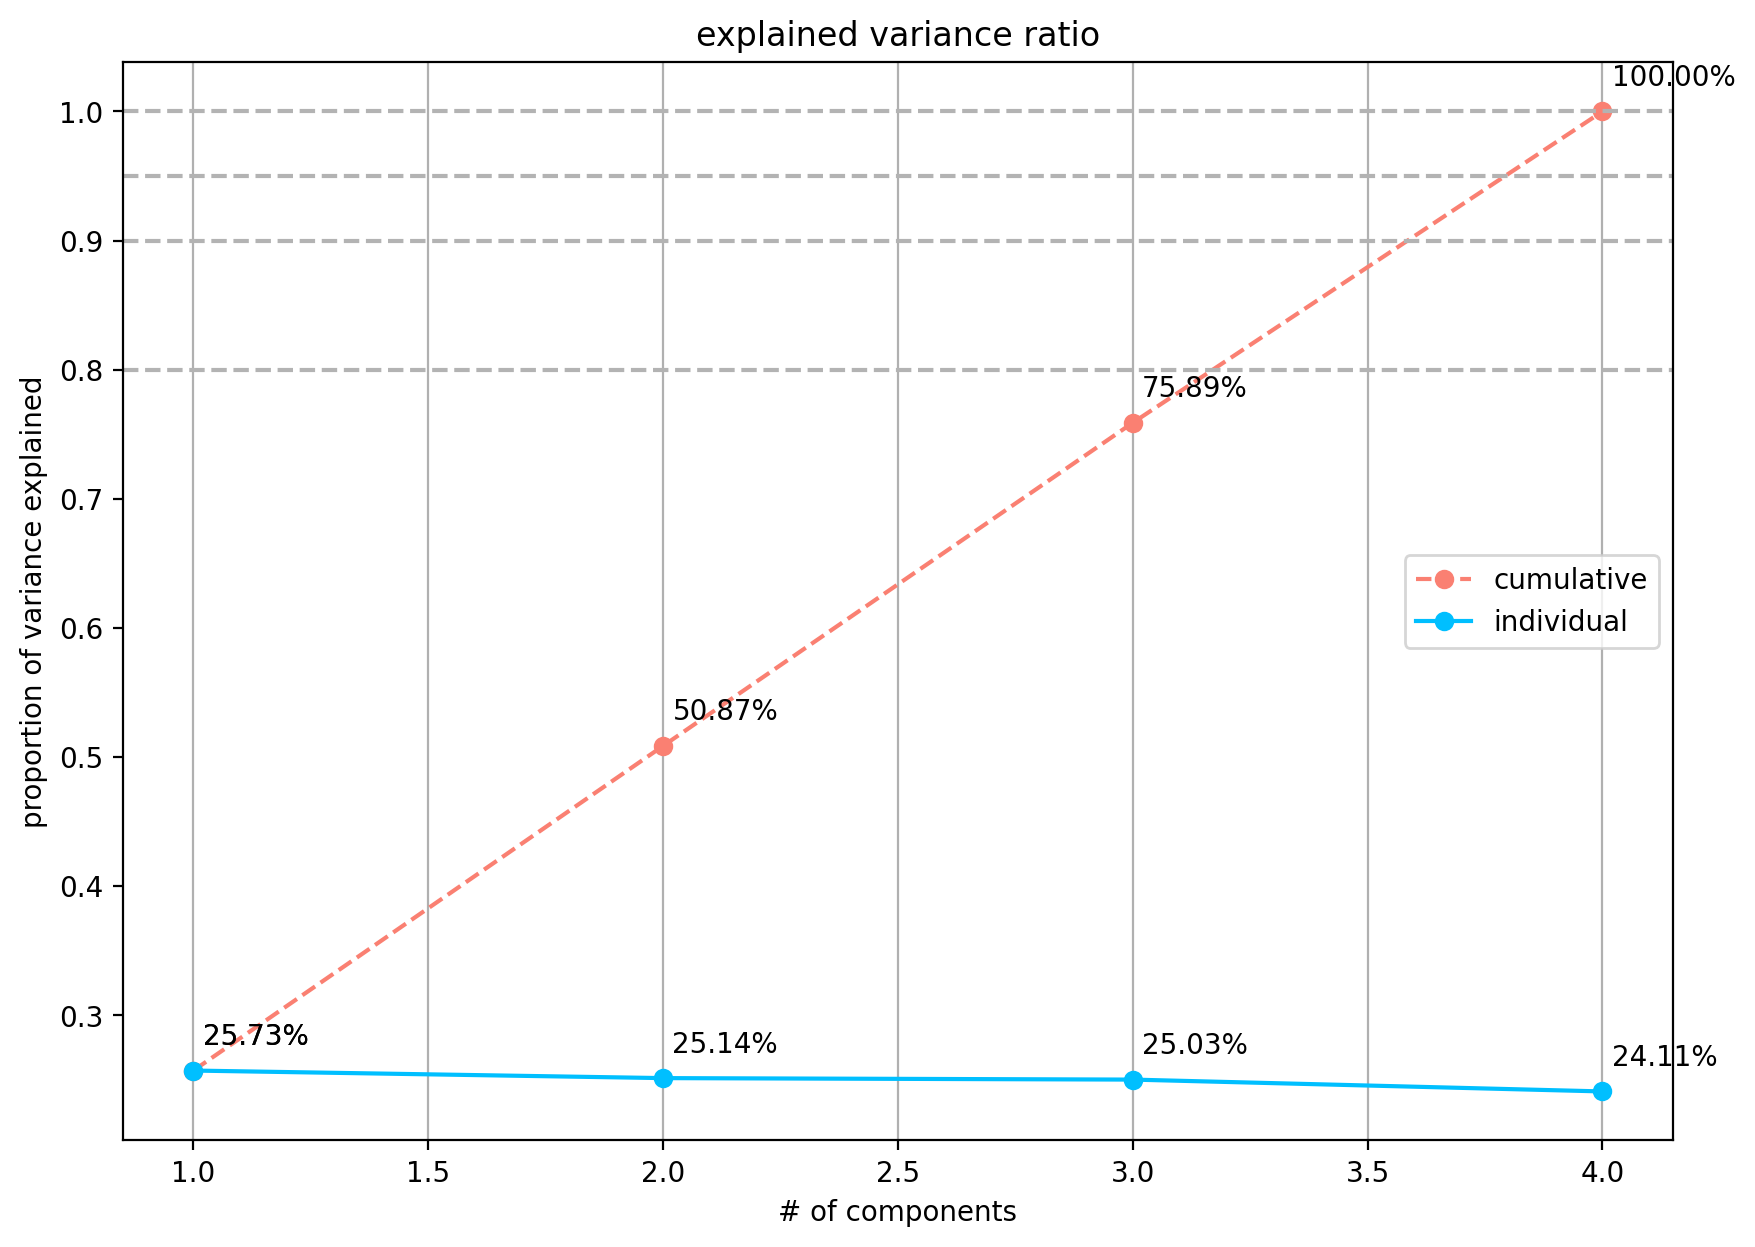

In [334]:
scree_plot(x_pca, 4, True, True)

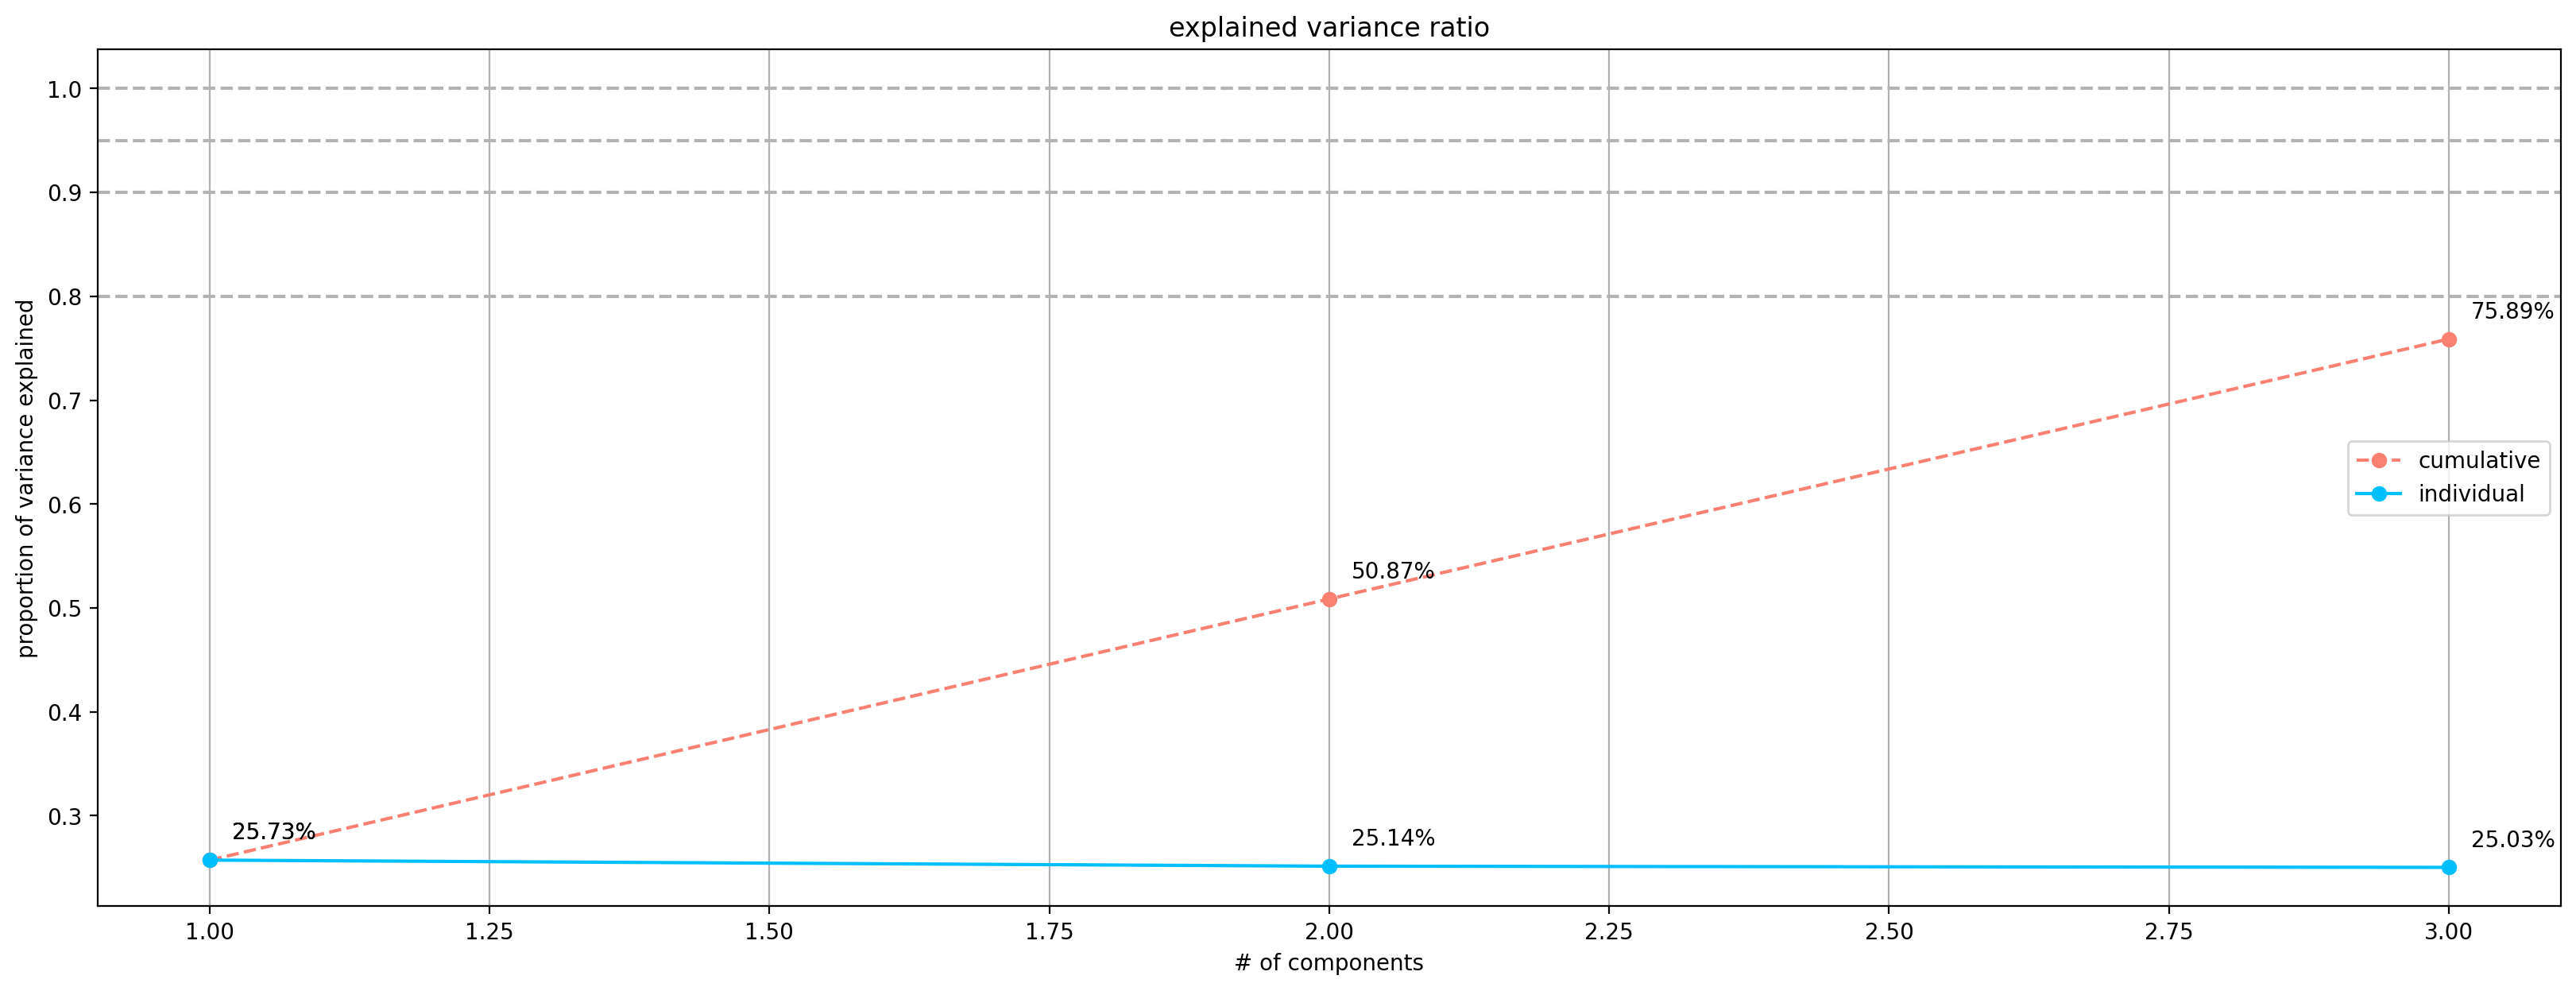

In [335]:
scree_plot(x_pca, 3, True, True, (20,7))

PC ต่างๆ

In [336]:
pca.components_ #Eigenvectors

array([[ 0.05928105,  0.66463148,  0.72880044,  0.15362513],
       [-0.27279522,  0.41125961, -0.17319774, -0.85232086],
       [-0.93927636,  0.05453826, -0.04414252,  0.33591208]])

In [337]:
#dpc=pd.DataFrame(pca.components_.T, 
                  #index=cols,
                  #columns=[f'PC{n+1}' for n in range(pca.components_.shape[0])]).round(4) #Eigenvectors
# dpc
#dpc.style.applymap(lambda e: 'background-color: yellow' if np.abs(e) > .5 else 'background-color: white')

In [338]:
dd=pd.concat([pd.DataFrame(pca.transform(x_pca_t), 
                           columns=[f'PC{n}' for n in range(1, pca.n_components_ + 1)]), 
              data[['churn']]], axis = 'columns')
dd.head()

,PC1,PC2,PC3,churn
0,-0.714294,0.403363,0.383884,1
1,0.224410,-0.003345,0.491679,0
2,1.112484,0.103918,1.481488,1
3,-0.875444,0.171401,-0.453135,0
4,0.897328,-0.227845,-2.074733,0


In [339]:
dd.shape

(10000, 4)

In [340]:
X_pca = X.drop(['credit_score','age','balance','estimated_salary','customer_id'], axis=1)


รวม DataFrame df_X และ df_dd

In [341]:
X_concat_pca = pd.concat([X_pca, dd], axis=1)

In [342]:
X_concat_pca = X_concat_pca.drop('churn', axis=1)
X_concat_pca

,tenure,products_number,credit_card,active_member,gender_numeric,country_numeric,PC1,PC2,PC3
0,2,1,1,1,1,1,-0.714294,0.403363,0.383884
1,1,1,0,1,1,3,0.224410,-0.003345,0.491679
2,8,3,1,0,1,1,1.112484,0.103918,1.481488
3,1,2,0,0,1,1,-0.875444,0.171401,-0.453135
4,2,1,1,1,1,3,0.897328,-0.227845,-2.074733
...,...,...,...,...,...,...,...,...,...
9995,5,2,1,0,2,1,-0.824753,-0.068045,-1.138589
9996,10,1,1,1,2,1,-0.550049,0.255130,1.309947
9997,7,1,0,1,1,1,-1.197656,0.792385,-0.868149
9998,3,2,1,0,2,2,0.233872,-0.111494,-1.205576


In [343]:
X = X.drop('customer_id', axis=1)

In [344]:
print("X_concat_pca หลังจาก่ผานการทำ PCA มีทั้ง numerical + catagorical: ",'\n', X_concat_pca.head())
print("X เป็นตัวแปรต้นหลังจากทำการ split dataเเล้ว :",'\n', X.head())
print('Y ที่มีเป็น churn :' ,'\n', Y)

X_concat_pca หลังจาก่ผานการทำ PCA มีทั้ง numerical + catagorical:  
    tenure  products_number  credit_card  active_member  gender_numeric  \
0       2                1            1              1               1   
1       1                1            0              1               1   
2       8                3            1              0               1   
3       1                2            0              0               1   
4       2                1            1              1               1   

   country_numeric       PC1       PC2       PC3  
0                1 -0.714294  0.403363  0.383884  
1                3  0.224410 -0.003345  0.491679  
2                1  1.112484  0.103918  1.481488  
3                1 -0.875444  0.171401 -0.453135  
4                3  0.897328 -0.227845 -2.074733  
X เป็นตัวแปรต้นหลังจากทำการ split dataเเล้ว : 
    credit_score  age  tenure    balance  products_number  credit_card  \
0           619   42       2       0.00                1   

In [345]:
X

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,gender_numeric,country_numeric
0,619,42,2,0.00,1,1,1,101348.88,1,1
1,608,41,1,83807.86,1,0,1,112542.58,1,3
2,502,42,8,159660.80,3,1,0,113931.57,1,1
3,699,39,1,0.00,2,0,0,93826.63,1,1
4,850,43,2,125510.82,1,1,1,79084.10,1,3
...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,2,1
9996,516,35,10,57369.61,1,1,1,101699.77,2,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1
9998,772,42,3,75075.31,2,1,0,92888.52,2,2


Import library

In [351]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier

## Decition Tree

จะทำเป็น 2 เเบบ เเบบที่ใช้ PCA  เเละ ไม่ได้ใช้ 
ตัวแปรมีทั้งหมด 3
1. X
2. X_concat_pca
3. Y

#### Decition Tree With X 

In [358]:
# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

# Train Model
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

# Test Model
Y_pred = model.predict(X_test)

# Print Classification Report
print(classification_report(Y_test, Y_pred))

# Calculate and print individual metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

              precision    recall  f1-score   support

           0       0.88      0.85      0.86      1607
           1       0.46      0.51      0.48       393

    accuracy                           0.79      2000
   macro avg       0.67      0.68      0.67      2000
weighted avg       0.80      0.79      0.79      2000

Accuracy: 0.7855
Precision: 0.4590909090909091
Recall: 0.5139949109414759
F1-score: 0.48499399759903966


#### Decition Tree With X_concat_pca

In [359]:
# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X_concat_pca, Y, test_size = 0.2, random_state=42)

# Train Model
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)

# Test Model
Y_pred = model.predict(X_test)

# Print Classification Report
print(classification_report(Y_test, Y_pred))

# Calculate and print individual metrics
accuracy_pca = accuracy_score(Y_test, Y_pred)
precision_pca = precision_score(Y_test, Y_pred)
recall_pca = recall_score(Y_test, Y_pred)
f1_pca = f1_score(Y_test, Y_pred)

print(f'Accuracy_pca: {accuracy_pca}')
print(f'Precision_pca: {precision_pca}')
print(f'Recall_pca: {recall_pca}')
print(f'F1-score_pca: {f1_pca}')

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      1607
           1       0.41      0.45      0.43       393

    accuracy                           0.76      2000
   macro avg       0.63      0.65      0.64      2000
weighted avg       0.77      0.76      0.77      2000

Accuracy_pca: 0.763
Precision_pca: 0.4073226544622426
Recall_pca: 0.4529262086513995
F1-score_pca: 0.42891566265060244


#### Random Forest with X

In [362]:
# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

# Train Model
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# Test Model
Y_pred = model.predict(X_test)

# Print Classification Report
print(classification_report(Y_test, Y_pred))

# Calculate and print individual metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.46      0.58       393

    accuracy                           0.87      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

Accuracy: 0.866
Precision: 0.7615062761506276
Recall: 0.4631043256997455
F1-score: 0.5759493670886077


#### Random Forest with X_concat_pca

In [363]:
# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X_concat_pca, Y, test_size = 0.2, random_state=42)

# Train Model
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# Test Model
Y_pred = model.predict(X_test)

# Print Classification Report
print(classification_report(Y_test, Y_pred))

# Calculate and print individual metrics
accuracy_pca = accuracy_score(Y_test, Y_pred)
precision_pca = precision_score(Y_test, Y_pred)
recall_pca = recall_score(Y_test, Y_pred)
f1_pca = f1_score(Y_test, Y_pred)

print(f'Accuracy_pca: {accuracy_pca}')
print(f'Precision_pca: {precision_pca}')
print(f'Recall_pca: {recall_pca}')
print(f'F1-score_pca: {f1_pca}')

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1607
           1       0.71      0.40      0.51       393

    accuracy                           0.85      2000
   macro avg       0.79      0.68      0.71      2000
weighted avg       0.84      0.85      0.83      2000

Accuracy_pca: 0.85
Precision_pca: 0.7066666666666667
Recall_pca: 0.40458015267175573
F1-score_pca: 0.5145631067961165


#### LogisticRegression with X

In [365]:
from sklearn.linear_model import LogisticRegression

# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=42)

# Train Model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Test Model
Y_pred = model.predict(X_test)

# Print Classification Report
print(classification_report(Y_test, Y_pred))

# Calculate and print individual metrics
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      1607
           1       0.45      0.07      0.12       393

    accuracy                           0.80      2000
   macro avg       0.63      0.53      0.51      2000
weighted avg       0.74      0.80      0.74      2000

Accuracy: 0.8005
Precision: 0.45161290322580644
Recall: 0.07124681933842239
F1-score: 0.12307692307692307


#### LogisticRegression with X_concat_pca

In [366]:
# Split Data
X_train, X_test, Y_train, Y_test = train_test_split(X_concat_pca, Y, test_size = 0.2, random_state=42)

# Train Model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Test Model
Y_pred = model.predict(X_test)

# Print Classification Report
print(classification_report(Y_test, Y_pred))

# Calculate and print individual metrics
accuracy_pca = accuracy_score(Y_test, Y_pred)
precision_pca = precision_score(Y_test, Y_pred)
recall_pca = recall_score(Y_test, Y_pred)
f1_pca = f1_score(Y_test, Y_pred)

print(f'Accuracy_pca: {accuracy_pca}')
print(f'Precision_pca: {precision_pca}')
print(f'Recall_pca: {recall_pca}')
print(f'F1-score_pca: {f1_pca}')

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.57      0.15      0.24       393

    accuracy                           0.81      2000
   macro avg       0.70      0.56      0.57      2000
weighted avg       0.77      0.81      0.76      2000

Accuracy_pca: 0.8105
Precision_pca: 0.5660377358490566
Recall_pca: 0.15267175572519084
F1-score_pca: 0.24048096192384769
